# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

# <h1><center>Tarea 03: Exploración de datos </center></h1>

**Fecha de Entrega:** 28 de octubre de 2025, a las 23:59.

**Fecha de publicación**: 14 de octubre de 2025.

**Formato de entrega:** Notebook ejecutado y comentado (`.ipynb`) en el módulo de Tarea 03 habilitado en Canvas.

## Instrucciones

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.
- La Tarea debe ser desarrollada en lenguaje de programación Python y la entrega en formato Jupyter Notebook.
- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados a los correctores, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.
- Notebook **autocontenible** que:
   - Ejecute sin errores todas las celdas.
  - Contenga tanto el código como los comentarios y explicaciones necesarias.
  - Incluya visualizaciones claras y correctamente etiquetadas.
- No se aceptarán notebooks con celdas rotas o que dependan de rutas externas no indicadas en la tarea.

- Deben hacer sus consultas y comentarios sobre la Tarea a través del canal de Tareas en el Foro del curso en Canvas.

---

## 1. Objetivos

- Aplicar los conceptos iniciales de manejo de datos y análisis exploratorio vistos en clases.
- Practicar la lectura, limpieza y manipulación de datos en Python.
- Desarrollar habilidades para visualizar y describir patrones y tendencias en conjuntos de datos reales.
- Fomentar la capacidad de comunicar resultados de forma clara y fundamentada.

### 1.1 Objetivo educacional

Esta Tarea tiene como objetivo que los estudiantes desarrollen la capacidad de manejar algunas de las librerías centrales para el desarrollo de Ciencia de Datos, con foco en la lectura y exploración de datos. 

Para los ejercicios a continuación, usted deberá leer, inspeccionar, manipular y graficar conjuntos de datos en distintos formatos, de manera de responder las preguntas de cada parte de la Tarea.

### 1.2 Pregunta de ciencia de datos

En esta tarea vamos a analizar la distribución de vulneribilidad escolar para distintos establecimientos educacionales en Chile, desde enseñanza parvularia hasta enseñanza media. Específicamente, queremos entender cómo se comporta un índice de vulnerabilidad en relación a variables como ruralidad, tipo de dependencia y comuna del establecimiento.

---

## 2. Datos

En este estudio, trabajaremos con los resultados publicados anualmente sobre por la JUNAEB
sobre vulnerabilidad de establecimientos educacionales en todo el territorio nacional. Estos resultados están disponibles en la siguiente página web:

* Índices de Vulnerabilidad (JUNAEB): https://www.junaeb.cl/medicion-la-vulnerabilidad-ivm/

Adicionalmente, para visualizar las variables, utilizaremos los mapas vectoriales que disponibiliza la Biblioteca del Congreso Nacional (BCN):

* Mapoteca BCN: https://www.bcn.cl/siit/mapas_vectoriales/index_html

### 2.1 Descarga de datos y conceptos generales (1 punto)

Acceda a los links entregados y descargue el set de datos del **Índice de Vulnerabilidad Multidimensional de Establecimientos Educacionales** para el año 2025. Este debería ser un documento XLSX con múltiples pestañas, incluyendo entre estas un índice que describe las columnas presentes en la base de datos.
Descargue además los archivos correspondientes a la **División comunal: polígonos de las comunas de Chile**. Este se descarga en formato `.zip` y contiene archivos shapefile para visualizar las comunas del país.

Investigue sobre este índice y responda de manera concisa: 
* ¿En qué consiste el IVM? ¿Qué rango de valores toma y qué significan? 
* ¿Cómo se obtiene el IVM de un establecimiento educacional?



Respuesta:

¿En qué consiste el IVM? El Índice de Vulnerabilidad Multidimensional (IVM) es una medida estadística que evalúa la vulnerabilidad "no observable" de un estudiante según su trayectoria escolar. Fue desarrollado por Junaeb y la Pontificia Universidad Católica de Chile. Se calcula anualmente de forma independiente para cuatro etapas: Parvularia, 1° Ciclo Básico, 2° Ciclo Básico y Media.

¿Qué rango de valores toma y qué significan? El IVM genera un puntaje que oscila entre 0 y 100, donde 100 representa la máxima vulnerabilidad posible. Este puntaje numérico también se expresa en cuatro categorías: bajo, medio, alto o muy alto.

¿Cómo se obtiene el IVM? Se obtiene consolidando múltiples fuentes de datos. Alrededor del 70% de la información proviene de la Encuesta de Vulnerabilidad de Junaeb (aplicada en pre-kínder, kínder, 1°, 5° básico y I° Medio). El 30% restante proviene de registros administrativos de otras instituciones del Estado (como MINEDUC, Registro Civil, FONASA, MDS, etc.). Luego, se aplican modelos estadísticos (como Análisis Factorial) para calcular el puntaje final.

## 3. Lectura y limpieza de datos (1 punto)

### 3.1 Datos de establecimientos (0.5 puntos)
El archivo descargado contiene información sobre establecimientos de cuatro tipos: Parvularia, Primer Ciclo Básica, Segundo Ciclo Básica y Media.
Cargue los datos de los establecimientos en cuatro DataFrames distintos.

Revise cada uno de sus sets de datos y haga un proceso de limpieza si lo considera necesario (manejo de valores nulos, duplicados, inválidos, transformación de tipos de datos, etc). De haberlos, identifique qué atributos son categóricos y transforme los tipos de columna de acuerdo a su decisión, mostrando todos los posibles valores de cada categoría.

Justifique **todas** sus decisiones, **incluso** si decide no realizar una limpieza o transformación.

Finalmente, responda:

* a. ¿Cuántos establecimientos tiene cada set de datos?
* b. ¿Cuánto espacio en memoria ocupan en total los 4 datasets?
* c. ¿Cuántos estudiantes fueron evaluados en todo el país para cada nivel de enseñanza para el año 2025?


In [45]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np


In [40]:

df_parv = pd.read_excel("data/IVM_Establecimientos_2025-2.xlsx", sheet_name="Parvularia")
df_basica1 = pd.read_excel("data/IVM_Establecimientos_2025-2.xlsx", sheet_name="1º Ciclo Básico")
df_basica2 = pd.read_excel("data/IVM_Establecimientos_2025-2.xlsx", sheet_name="2º Ciclo Básico")
df_media = pd.read_excel("data/IVM_Establecimientos_2025-2.xlsx", sheet_name="Media")


In [4]:
df_parv.info()
df_parv.notnull().sum()
df_parv.describe()
df_parv.duplicated().sum()

#viendo esto se ve que no hay datos nulos ni duplicados en el dataset de parvulario y por lo tanto no necesita mas limpieza de la que ya existe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6163 entries, 0 to 6162
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_RBD                    6163 non-null   int64  
 1   DV_RBD                    6163 non-null   int64  
 2   DS_NOM_ESTABLE            6163 non-null   object 
 3   DS_TIPO_DEPENDENCIA       6163 non-null   object 
 4   DS_RURALIDAD              6163 non-null   object 
 5   ID_REGION_ESTABLE         6163 non-null   int64  
 6   ID_PROVINCIA_ESTABLE      6163 non-null   int64  
 7   ID_COMUNA_ESTABLE         6163 non-null   int64  
 8   DS_COMUNA_ESTABLE         6163 non-null   object 
 9   N EVALUADO                6163 non-null   int64  
 10  IVM Establecimiento       6163 non-null   float64
 11  IVM Bajo                  6163 non-null   int64  
 12  IVM Medio                 6163 non-null   int64  
 13  IVM Alto                  6163 non-null   int64  
 14  IVM Muy 

np.int64(0)

In [5]:
df_basica1.info()
df_basica1.notnull().sum()
df_basica1.describe()
df_basica1.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7082 entries, 0 to 7081
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_RBD                7082 non-null   int64  
 1   DV_RBD                7082 non-null   int64  
 2   DS_NOM_ESTABLE        7082 non-null   object 
 3   DS_TIPO_DEPENDENCIA   7082 non-null   object 
 4   DS_RURALIDAD          7082 non-null   object 
 5   ID_REGION_ESTABLE     7082 non-null   int64  
 6   ID_PROVINCIA_ESTABLE  7082 non-null   int64  
 7   ID_COMUNA_ESTABLE     7082 non-null   int64  
 8   DS_COMUNA_ESTABLE     7082 non-null   object 
 9   N EVALUADO            7082 non-null   int64  
 10  IVM Establecimiento   7082 non-null   float64
 11  IVM Bajo              7082 non-null   int64  
 12  IVM Medio             7082 non-null   int64  
 13  IVM Alto              7082 non-null   int64  
 14  IVM Muy Alto          7082 non-null   int64  
 15  IVM Salud            

np.int64(0)

In [6]:
df_basica2.info()
df_basica2.notnull().sum()
df_basica2.describe()
df_basica2.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5662 entries, 0 to 5661
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_RBD                5662 non-null   int64  
 1   DV_RBD                5662 non-null   int64  
 2   DS_NOM_ESTABLE        5662 non-null   object 
 3   DS_TIPO_DEPENDENCIA   5662 non-null   object 
 4   DS_RURALIDAD          5662 non-null   object 
 5   ID_REGION_ESTABLE     5662 non-null   int64  
 6   ID_PROVINCIA_ESTABLE  5662 non-null   int64  
 7   ID_COMUNA_ESTABLE     5662 non-null   int64  
 8   DS_COMUNA_ESTABLE     5662 non-null   object 
 9   N EVALUADO            5662 non-null   int64  
 10  IVM Establecimiento   5662 non-null   float64
 11  IVM Bajo              5662 non-null   int64  
 12  IVM Medio             5662 non-null   int64  
 13  IVM Alto              5662 non-null   int64  
 14  IVM Muy Alto          5662 non-null   int64  
dtypes: float64(1), int64(

np.int64(0)

In [7]:
df_media.info()
df_media.notnull().sum()
df_media.describe()
df_media.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_RBD                2618 non-null   int64  
 1   DV_RBD                2618 non-null   int64  
 2   DS_NOM_ESTABLE        2618 non-null   object 
 3   DS_TIPO_DEPENDENCIA   2618 non-null   object 
 4   DS_RURALIDAD          2618 non-null   object 
 5   ID_REGION_ESTABLE     2618 non-null   int64  
 6   ID_PROVINCIA_ESTABLE  2618 non-null   int64  
 7   ID_COMUNA_ESTABLE     2618 non-null   int64  
 8   DS_COMUNA_ESTABLE     2618 non-null   object 
 9   N EVALUADO            2618 non-null   int64  
 10  IVM Establecimiento   2618 non-null   float64
 11  IVM Bajo              2618 non-null   int64  
 12  IVM Medio             2618 non-null   int64  
 13  IVM Alto              2618 non-null   int64  
 14  IVM Muy Alto          2618 non-null   int64  
dtypes: float64(1), int64(

np.int64(0)

--Se revisaron los datasets y se concluyo que ya estan ordenados y limpiados acordemente para ser utilizados en el analisis.

In [8]:
n = df_parv.memory_usage(deep=True).sum()
kb = n / 1024
m = kb / 1024
print(m)

2.4612369537353516


In [9]:
n2 = df_basica1.memory_usage(deep=True).sum() 
kb2 = n2 / 1024
m2 = kb2 / 1024
print(m2)

2.919889450073242


In [10]:
n3 = df_basica2.memory_usage(deep=True).sum()
kb3 = n3 / 1024
m3 = kb3 / 1024
print(m3)

2.000594139099121


In [11]:
n4 =df_media.memory_usage(deep=True).sum()
kb4 = n4 / 1024
m4 = kb4 / 1024
print(m4)

0.9323234558105469


In [12]:
total = m + m2 + m3 + m4
print(total)

8.314043998718262


In [13]:
student_col = ['N EVALUADO'] 
estudiantes_parv = df_parv[student_col].sum()
estudiantes_basica1 = df_basica1[student_col].sum()
estudiantes_basica2 = df_basica2[student_col].sum()
estudiantes_media = df_media[student_col].sum()

print(estudiantes_parv)
print(estudiantes_basica1)
print(estudiantes_basica2)
print(estudiantes_media)

N EVALUADO    255506
dtype: int64
N EVALUADO    882881
dtype: int64
N EVALUADO    484540
dtype: int64
N EVALUADO    901899
dtype: int64


# Respuestas

A) el dataset parvulario tiene 6163 establecimientos, el primer ciclo básico tiene 7082 establecimientos, el segundo ciclo básico tiene 5662 establecimientos, y el dataset de media tiene 2618 establecimientos.


b) los 4 datasets ocupan un total de 8.314043998718262 mb de memoria


c)Los estudaiantes evaluados por ciclo son los siguientes:
parvulario = 255506
1° ciclo = 882881
2° ciclo = 484540
media = 901899

### 3.2 Datos geográficos (0.5 puntos)

Cargue en un GeoDataFrame de GeoPandas la información de los polígonos de cada comuna del país.

Como realizamos en la Tarea pasada, puede transformar el Coordinate Reference System (CRS) a EPSG 4326, para tener la información de los puntos de los polígonos con latitud y longitud.

EPSG:3857
EPSG:4326


<Axes: >

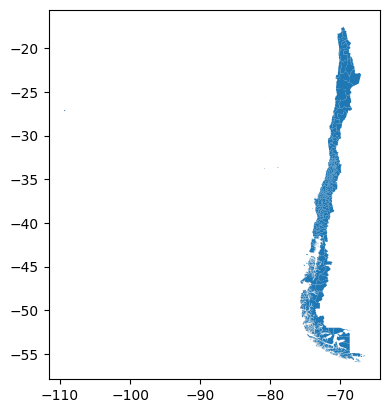

In [14]:
# Respuesta
gdf = gpd.read_file("data")
print(gdf.crs)
gdf = gdf.to_crs(epsg=4326)
print(gdf.crs)
gdf.plot()


## 4. Análisis descriptivo (1.5 puntos)

En esta sección haremos una exploración preliminar de los 4 sets de datos cargados. Para cada una de las siguientes preguntas, sustente su respuesta con al menos un gráfico y su análisis respectivo.

**Recomendación:** puede utilizar el método `subplots()` de `matplotlib.pyplot` para facilitar la visualización de múltiples gráficos a la vez.

### 4.1 Ruralidad (0.8 pts)
* a. ¿Cuál es la cantidad de establecimientos rurales vs urbanos según nivel de enseñanza?
* b. ¿Cómo se distribuye el IVM según nivel de enseñanza y ruralidad?


In [16]:
import seaborn as sns

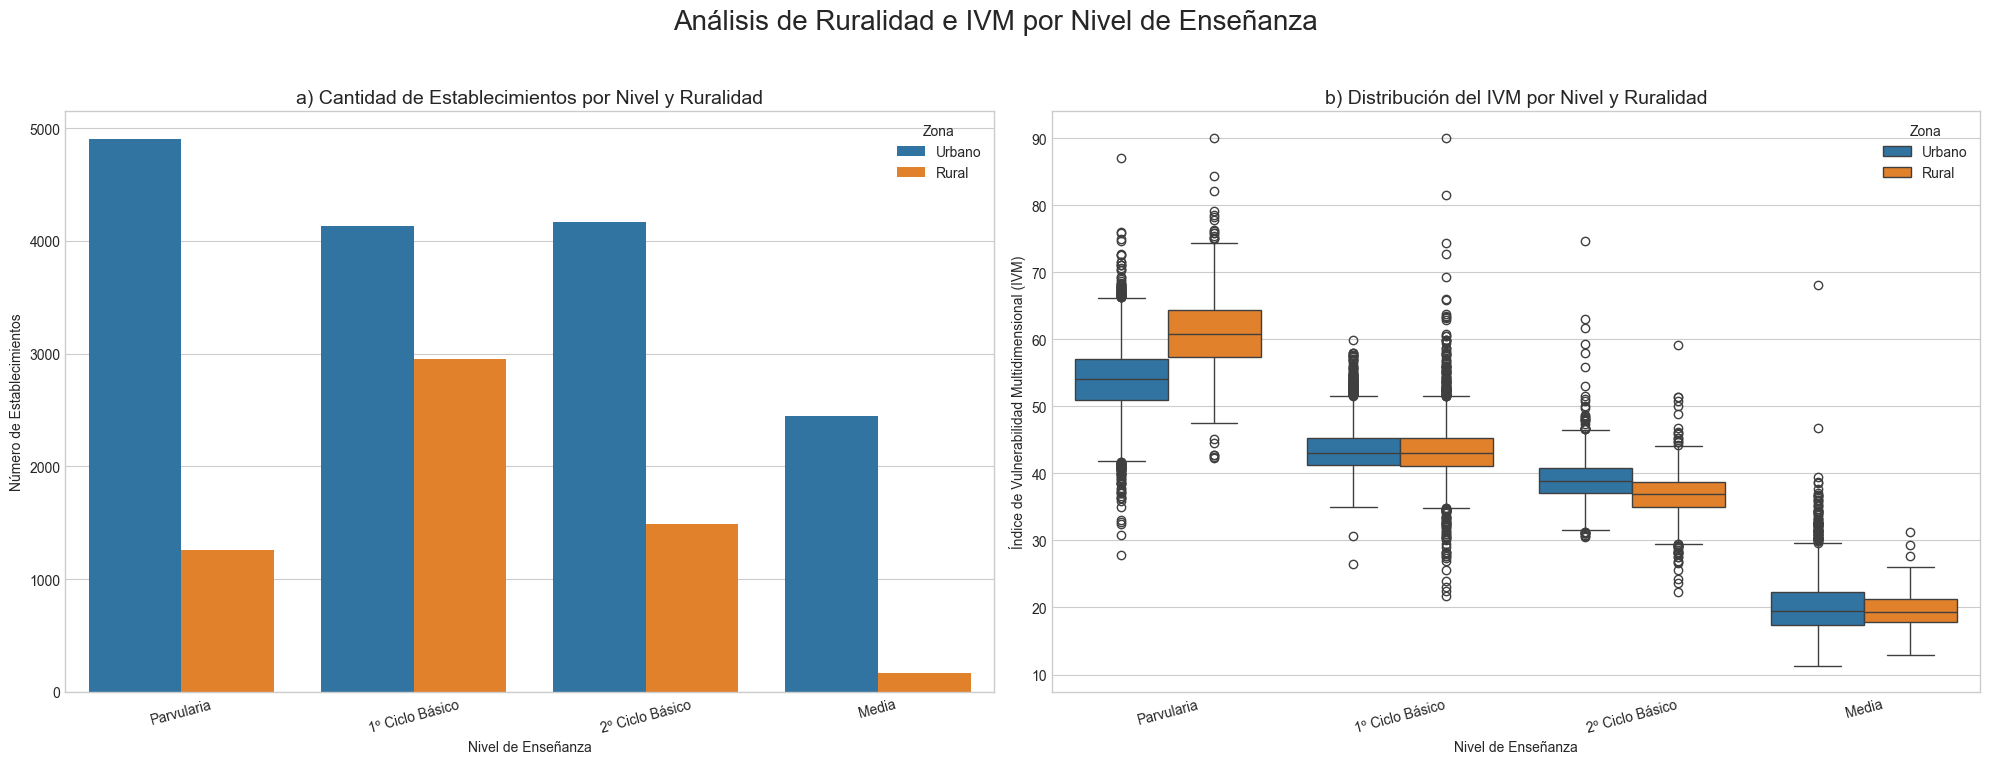

In [ ]:
df_parv['NIVEL'] = 'Parvularia'
df_basica1['NIVEL'] = '1º Ciclo Básico'
df_basica2['NIVEL'] = '2º Ciclo Básico'
df_media['NIVEL'] = 'Media'

df_completo = pd.concat([df_parv, df_basica1, df_basica2, df_media])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
fig.suptitle('Análisis de Ruralidad e IVM por Nivel de Enseñanza', fontsize=20)

# Grafico A
sns.countplot(data=df_completo, x='NIVEL', hue='DS_RURALIDAD', ax=axes[0], order=['Parvularia', '1º Ciclo Básico', '2º Ciclo Básico', 'Media'])
axes[0].set_title('a) Cantidad de Establecimientos por Nivel y Ruralidad', fontsize=14)
axes[0].set_xlabel('Nivel de Enseñanza')
axes[0].set_ylabel('Número de Establecimientos')
axes[0].tick_params(axis='x', rotation=15)
axes[0].legend(title='Zona')

df_completo['IVM_numeric'] = pd.to_numeric(df_completo['IVM Establecimiento'], errors='coerce')

# Grafico B
sns.boxplot(data=df_completo, x='NIVEL', y='IVM_numeric', hue='DS_RURALIDAD', ax=axes[1], order=['Parvularia', '1º Ciclo Básico', '2º Ciclo Básico', 'Media'])
axes[1].set_title('b) Distribución del IVM por Nivel y Ruralidad', fontsize=14)
axes[1].set_xlabel('Nivel de Enseñanza')
axes[1].set_ylabel('Índice de Vulnerabilidad Multidimensional (IVM)')
axes[1].tick_params(axis='x', rotation=15)
axes[1].legend(title='Zona')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Respuesta y comentarios:

a) Cantidad de Establecimientos por Nivel y Ruralidad
Este gráfico de barras muestra el número total de escuelas (eje Y) para cada nivel de enseñanza (eje X), separado por zona (urbana o rural).

Dominio Urbano: Las barras azules (Urbano) son significativamente más altas que las naranjas (Rural) en todas las categorías.

Educación Básica: El "1er Ciclo Básico" es el nivel donde existe la mayor cantidad de establecimientos rurales (cerca de 3.000). Sin embargo, este número cae a la mitad en el "2º Ciclo Básico" (aprox. 1.500).

Educación Media: Aquí se observa la mayor brecha. La cantidad de establecimientos rurales es mínima (casi inexistente en el gráfico, quizás 200-300) en comparación con la gran oferta urbana (aprox. 2.500).

Parvularia: Es el nivel con más establecimientos urbanos en total (casi 5.000), muy por encima de la oferta rural (aprox. 1.250).

Conclusión: La disponibilidad de establecimientos rurales disminuye drásticamente a medida que avanza el nivel educativo, siendo la Educación Media el punto más crítico.

b) Distribución del IVM por Nivel y Ruralidad
Este gráfico de cajas muestra cómo se distribuye el "Índice de Vulnerabilidad Multidimensional" (IVM). Un índice más alto significa mayor vulnerabilidad. La línea dentro de la caja es la mediana (el valor central).

Brecha de Vulnerabilidad: En todos los niveles de enseñanza, la caja naranja (Rural) está posicionada más arriba que la azul (Urbana). Esto indica que la mediana de vulnerabilidad es consistentemente más alta en zonas rurales.

Parvularia: Es el nivel con la vulnerabilidad más alta para ambas zonas. Los establecimientos rurales de párvulos son los más vulnerables de todo el gráfico, con una mediana de IVM cercana a 60, comparado con el 45 de los urbanos.

Tendencia por Nivel: La vulnerabilidad (IVM) tiende a disminuir a medida que el nivel de enseñanza aumenta. Los niveles de "2º Ciclo Básico" y "Media" tienen las medianas de IVM más bajas.

Dispersión: Se observan muchos valores atípicos (círculos), especialmente en Parvularia Urbana, lo que indica una gran desigualdad incluso dentro de la misma zona.

Conclusión: La vulnerabilidad es un problema mayor en los niveles iniciales (Parvularia) y afecta de manera más significativa a los establecimientos rurales en todas las etapas educativas.

### 4.2 Tipo de establecimiento (0.7 pts)

* ¿Cómo es la distribución del IVM promedio de los establecimientos según tipo de dependencia y nivel de enseñanza? 

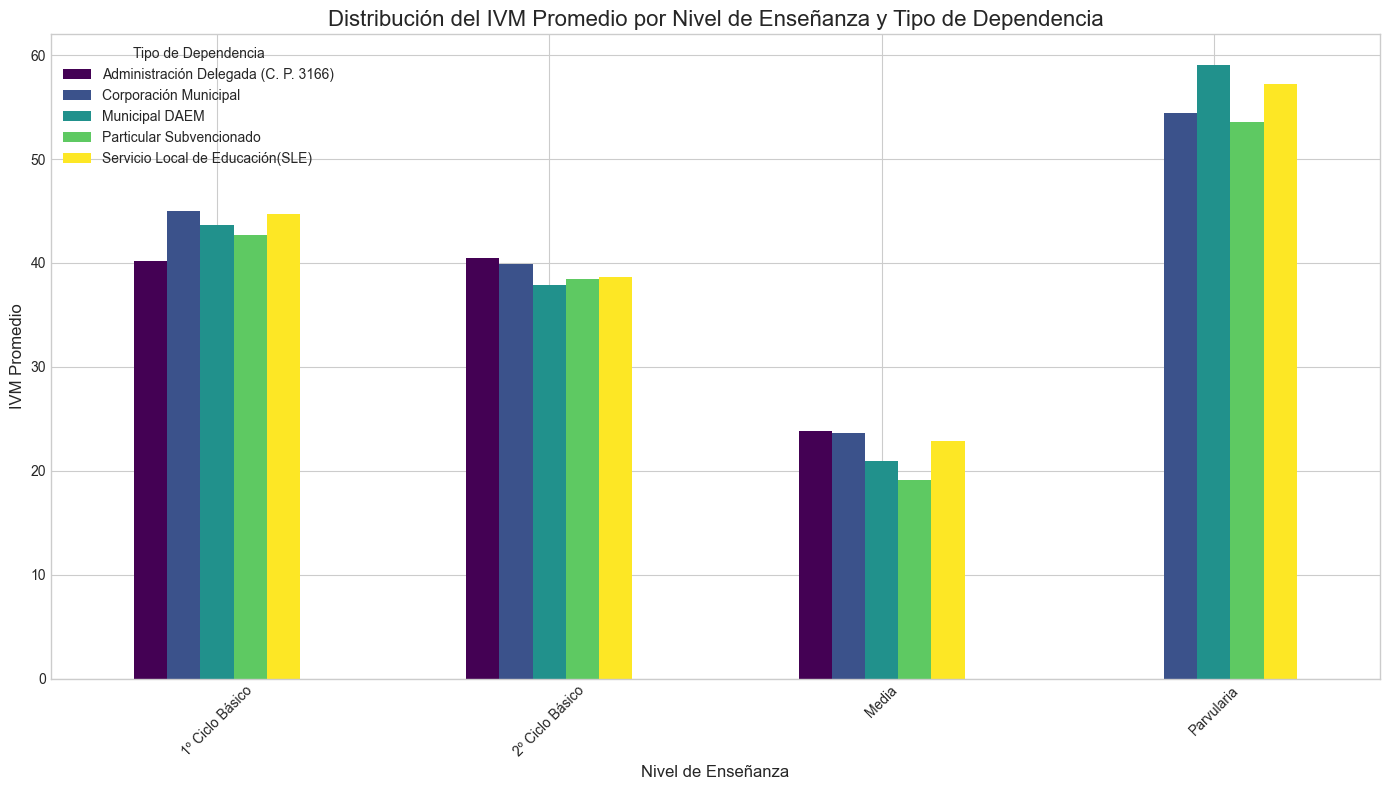

In [ ]:
df_parv['NIVEL_ENSENANZA'] = 'Parvularia'
df_basica1['NIVEL_ENSENANZA'] = '1º Ciclo Básico'
df_basica2['NIVEL_ENSENANZA'] = '2º Ciclo Básico'
df_media['NIVEL_ENSENANZA'] = 'Media'

df_completo = pd.concat([df_parv, df_basica1, df_basica2, df_media], ignore_index=True)

df_completo['IVM'] = pd.to_numeric(df_completo['IVM Establecimiento'], errors='coerce')

ivm_promedio = df_completo.groupby(['NIVEL_ENSENANZA', 'DS_TIPO_DEPENDENCIA'])['IVM'].mean().unstack()

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 8))

ivm_promedio.plot(kind='bar', ax=ax, colormap='viridis')

ax.set_title('Distribución del IVM Promedio por Nivel de Enseñanza y Tipo de Dependencia', fontsize=16)
ax.set_xlabel('Nivel de Enseñanza', fontsize=12)
ax.set_ylabel('IVM Promedio', fontsize=12)
ax.legend(title='Tipo de Dependencia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Respuesta y comentarios:

El Nivel de Enseñanza es el factor clave: La vulnerabilidad (IVM) depende mucho más del nivel educativo que del tipo de administración.

Parvularia es la más vulnerable: Muestra, por lejos, el IVM promedio más alto en todas las dependencias.

Media es la menos vulnerable: Es el nivel con los promedios de IVM más bajos en todas las categorías.

Particulares Subvencionados = Menor IVM: Constantemente, los colegios "Particulares Subvencionados" (barra verde) registran el promedio de vulnerabilidad más bajo en todos los niveles de enseñanza.

### 4.3 Pregunta Bono: Dimensiones de vulnerabilidad (1 punto)

Para los niveles de enseñanza Parvularia y Básica Primer ciclo (1-4º), tenemos información sobre distintas dimensiones de que se utilizan para calcular el IVM, como condición socioeconómica familiar y comunal, salud, etc. 

* Para todo Chile, en promedio, ¿cuál es la dimensión con mayor puntaje de IVM para cada uno de estos dos niveles de enseñanza?

In [ ]:
# Respuestas

Respuesta y comentarios:

## 5. Agrupación de bases de datos (2 puntos)

El objetivo de esta sección será agrupar los establecimientos según la comuna en la que se encuentran para obtener un resumen general sobre la vulnerabilidad escolar en cada una de ellas. Al finalizar esta sección, tendremos un nuevo DataFrame `agg_comunal` que contenga, al menos, la siguiente información:

* Comuna (nombre y ID)
* Región (ID)
* Cantidad de establecimientos rurales de la comuna
* Cantidad de establecimientos urbanos de la comuna
* Cantidad total de establecimientos de la comuna
* Porcentaje de establecimientos rurales
* IVM Promedio Parvularia de la comuna
* IVM Promedio Básica Primer Ciclo de la comuna
* IVM Promedio Básica Segundo Ciclo de la comuna
* IVM Promedio Media de la comuna
* Objeto geometry de GeoPandas correspondiente al polígono de la comuna respectiva

Armaremos este DataFrame paso a paso.

### 5.1 Cálculo de IVM promedio por comuna (0.8 pts)

Primero, para cada uno sus 4 DataFrames, calcule el promedio de la columna `IVM Establecimiento` según comuna. Almacene este valor en una nueva columna llamada `IVM Promedio {NIVEL DE ENSEÑANZA}` (por ejemplo, para enseñanza parvularia, cree la columna `IVM Promedio Parvularia`).

Junte los 4 resultados que obtuvo en un solo DataFrame `ivm_comunal` que contenga:
* Comuna (nombre y ID)
* Región (ID)
* IVM Promedio Parvularia de la comuna
* IVM Promedio Básica Primer Ciclo de la comuna
* IVM Promedio Básica Segundo Ciclo de la comuna
* IVM Promedio Media de la comuna

Ponga siempre atención al tamaño de sus DataFrames: como estamos agrupando comunalmente, estos siempre debiesen tener una cantidad de filas igual a las comunas de Chile.

In [33]:
from functools import reduce

In [ ]:
def calcular_ivm_promedio_por_comuna(df, nivel_enseñanza):
    df['IVM'] = pd.to_numeric(df['IVM Establecimiento'], errors='coerce')

    ivm_promedio = df.groupby(['ID_REGION_ESTABLE', 'ID_COMUNA_ESTABLE', 'DS_COMUNA_ESTABLE'])['IVM Establecimiento'].mean().reset_index()

    ivm_promedio.rename(columns={'IVM Establecimiento': f'IVM Promedio {nivel_enseñanza}'}, inplace=True)

    return ivm_promedio

ivm_parvularia = calcular_ivm_promedio_por_comuna(df_parv, 'Parvularia')
ivm_basica1 = calcular_ivm_promedio_por_comuna(df_basica1, 'Básica Primer Ciclo')
ivm_basica2 = calcular_ivm_promedio_por_comuna(df_basica2, 'Básica Segundo Ciclo')
ivm_media = calcular_ivm_promedio_por_comuna(df_media, 'Media')

dataframes_a_unir = [ivm_parvularia, ivm_basica1, ivm_basica2, ivm_media]

ivm_comunal = reduce(lambda left, right: pd.merge(left, right, on=['ID_REGION_ESTABLE', 'ID_COMUNA_ESTABLE', 'DS_COMUNA_ESTABLE'], how='outer'), dataframes_a_unir)

ivm_comunal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID_REGION_ESTABLE                  345 non-null    int64  
 1   ID_COMUNA_ESTABLE                  345 non-null    int64  
 2   DS_COMUNA_ESTABLE                  345 non-null    object 
 3   IVM Promedio Parvularia            338 non-null    float64
 4   IVM Promedio Básica Primer Ciclo   345 non-null    float64
 5   IVM Promedio Básica Segundo Ciclo  344 non-null    float64
 6   IVM Promedio Media                 335 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 19.0+ KB


In [37]:
ivm_comunal.head()

,ID_REGION_ESTABLE,ID_COMUNA_ESTABLE,DS_COMUNA_ESTABLE,IVM Promedio Parvularia,IVM Promedio Básica Primer Ciclo,IVM Promedio Básica Segundo Ciclo,IVM Promedio Media
0,1,1101,Iquique,50.882970,45.131982,39.182182,22.109517
1,1,1107,Alto Hospicio,55.419776,46.599904,41.289463,24.250219
2,1,1401,Pozo Almonte,59.804991,44.159905,35.386361,22.676408
3,1,1402,Camiña,68.812360,46.127984,34.998365,17.966318
4,1,1403,Colchane,71.742419,56.888644,32.721880,27.648785


Se ve que existen exactamente 345 filas que es igual al numero de comunas de chile

### 5.2 Establecimientos por comuna y ruralidad (0.8 pts)

Ahora contaremos la cantidad de establecimientos por comuna según ruralidad. Como buscamos la cantidad total de establecimientos, consideramos establecimientos de todos los niveles educacionales vistos. Para esto, combine los 4 DataFrames que cargó y genere un nuevo DataFrame `estab_comunal` que contenga:

* Comuna (ID)
* Cantidad de establecimientos rurales
* Cantidad de establecimientos urbanos
* Cantidad total de establecimientos
* Porcentaje de establecimientos rurales (Establecimientos rurales / Total establecimientos * 100)

Tenga en cuenta de que pueden aparecer establecimientos duplicados al combinar estos 4 DataFrames (por ejemplo, establecimientos que imparten múltiples niveles de enseñanza, desde 1º básico hasta 4º medio). Preocúpese de manejar estos casos antes de agrupar sus datos según ruralidad.

In [81]:

df_completo = pd.concat([df_parv, df_basica1, df_basica2, df_media], ignore_index=True)
df_sin_duplicados = df_completo.drop_duplicates(subset="ID_RBD")


condicion_rural = df_sin_duplicados['DS_RURALIDAD'].astype(str).str.strip().str.lower().isin(['rural', '1'])

estab_por_comuna = df_sin_duplicados.assign(
    TIPO_ESTABLECIMIENTO=np.where(condicion_rural, 'Rural', 'Urbano')
).groupby(['ID_COMUNA_ESTABLE', 'TIPO_ESTABLECIMIENTO']).size().unstack(fill_value=0)

if 'Rural' not in estab_por_comuna.columns:
    estab_por_comuna['Rural'] = 0
if 'Urbano' not in estab_por_comuna.columns:
    estab_por_comuna['Urbano'] = 0

estab_comunal = pd.DataFrame(index=estab_por_comuna.index)
estab_comunal['Cantidad de establecimientos rurales'] = estab_por_comuna['Rural']
estab_comunal['Cantidad de establecimientos urbanos'] = estab_por_comuna['Urbano']

estab_comunal['Cantidad total de establecimientos'] = estab_comunal['Cantidad de establecimientos rurales'] + estab_comunal['Cantidad de establecimientos urbanos']
estab_comunal['Porcentaje de establecimientos rurales'] = (estab_comunal['Cantidad de establecimientos rurales'] / estab_comunal['Cantidad total de establecimientos'] * 100).round(2)

estab_comunal.reset_index(inplace=True)
estab_comunal.rename(columns={'ID_COMUNA_ESTABLE': 'Comuna (ID)'}, inplace=True)

estab_comunal.head(10)







,Comuna (ID),Cantidad de establecimientos rurales,Cantidad de establecimientos urbanos,Cantidad total de establecimientos,Porcentaje de establecimientos rurales
0,1101,3,81,84,3.57
1,1107,3,41,44,6.82
2,1401,12,0,12,100.00
3,1402,10,0,10,100.00
4,1403,4,0,4,100.00
5,1404,12,0,12,100.00
6,1405,4,0,4,100.00
7,2101,0,94,94,0.00
8,2102,1,6,7,14.29
9,2103,0,2,2,0.00


In [82]:
estab_comunal.describe()

,Comuna (ID),Cantidad de establecimientos rurales,Cantidad de establecimientos urbanos,Cantidad total de establecimientos,Porcentaje de establecimientos rurales
count,345.000000,345.000000,345.000000,345.000000,345.000000
mean,9025.817391,8.782609,17.968116,26.750725,48.440493
std,3819.867435,8.844703,26.499816,27.266480,32.682640
min,1101.000000,0.000000,0.000000,1.000000,0.000000
25%,6109.000000,2.000000,3.000000,9.000000,15.380000
50%,8313.000000,6.000000,7.000000,17.000000,54.170000
75%,13103.000000,13.000000,18.000000,34.000000,75.000000
max,16305.000000,56.000000,148.000000,152.000000,100.000000


### 5.3 Unión de bases de datos y polígonos (0.4 pts)

Finalmente, vamos a generar el DataFrame `agg_comunal` con la información de los dos previos DataFrames creados.
Combine la información de las dos secciones anteriores para crear su base de datos unificada. Por último, agregue la columna `geometry` con la información geográfica de cada comuna.

In [84]:
comunas_gdf = gpd.read_file('data/comunas.shp')
print(comunas_gdf.columns)

Index(['objectid', 'shape_leng', 'dis_elec', 'cir_sena', 'cod_comuna',
       'codregion', 'st_area_sh', 'st_length_', 'Region', 'Comuna',
       'Provincia', 'geometry'],
      dtype='object')


In [86]:
# respuestas
if 'ID_COMUNA_ESTABLE' in ivm_comunal.columns:
    ivm_comunal.rename(columns={'ID_COMUNA_ESTABLE': 'Comuna (ID)'}, inplace=True)


ivm_comunal['Comuna (ID)'] = ivm_comunal['Comuna (ID)'].astype(int)
estab_comunal['Comuna (ID)'] = estab_comunal['Comuna (ID)'].astype(int)

agg_comunal = pd.merge(
    ivm_comunal,
    estab_comunal,
    on='Comuna (ID)',
    how='outer'
)


comunas_gdf = gpd.read_file('data/comunas.shp')


comunas_gdf['cod_comuna'] = comunas_gdf['cod_comuna'].astype(int)


agg_comunal = pd.merge(
    agg_comunal,
    comunas_gdf[['cod_comuna', 'Comuna', 'codregion', 'geometry']], 
    left_on='Comuna (ID)',
    right_on='cod_comuna',
    how='left'
)


if 'NOM_COM_RBD' in agg_comunal.columns:
    agg_comunal = agg_comunal.drop(columns=['cod_comuna', 'NOM_COM_RBD', 'ID_REGION'])
else:
    agg_comunal = agg_comunal.drop(columns=['cod_comuna'])



agg_comunal = agg_comunal.rename(columns={
    'Comuna': 'Comuna (Nombre)',
    'codregion': 'Región (ID)'
})


orden_columna = [
    'Comuna (ID)', 'Comuna (Nombre)', 'Región (ID)',
    'Cantidad de establecimientos rurales', 'Cantidad de establecimientos urbanos',
    'Cantidad total de establecimientos', 'Porcentaje de establecimientos rurales',
    'IVM Promedio Parvularia', 'IVM Promedio Básica Primer Ciclo',
    'IVM Promedio Básica Segundo Ciclo', 'IVM Promedio Media', 'geometry'
]

existing_columns = [col for col in orden_columna if col in agg_comunal.columns]
agg_comunal = agg_comunal[existing_columns]

agg_comunal = gpd.GeoDataFrame(agg_comunal, geometry='geometry')


agg_comunal.head()

,Comuna (ID),Comuna (Nombre),Región (ID),Cantidad de establecimientos rurales,Cantidad de establecimientos urbanos,Cantidad total de establecimientos,Porcentaje de establecimientos rurales,IVM Promedio Parvularia,IVM Promedio Básica Primer Ciclo,IVM Promedio Básica Segundo Ciclo,IVM Promedio Media,geometry
0,1101,Iquique,1,3,81,84,3.57,50.882970,45.131982,39.182182,22.109517,"MULTIPOLYGON (((-7810213.515 -2298008.28, -781..."
1,1107,Alto Hospicio,1,3,41,44,6.82,55.419776,46.599904,41.289463,24.250219,"POLYGON ((-7780326.132 -2281256.031, -7780819...."
2,1401,Pozo Almonte,1,12,0,12,100.00,59.804991,44.159905,35.386361,22.676408,"POLYGON ((-7680137.117 -2263683.92, -7679921.3..."
3,1402,Camiña,1,10,0,10,100.00,68.812360,46.127984,34.998365,17.966318,"POLYGON ((-7716241.554 -2170371.522, -7716311...."
4,1403,Colchane,1,4,0,4,100.00,71.742419,56.888644,32.721880,27.648785,"POLYGON ((-7681876.609 -2149370.334, -7681868...."


## 6. Análisis de vulnerabilidad por comuna (1.5 puntos)

### 6.1 Mapa de calor (0.8 pts)

Genere mapas de calor de las comunas de Chile según el IVM promedio de los establecimientos educacionales. Realice esto para cada etapa de enseñanza (Parvularia, Básica 1, Básica 2 y Media). Analice y comente sus resultados:
* ¿Cómo se diferencia la vulnerabilidad en distintos sectores del país según nivel de enseñanza?

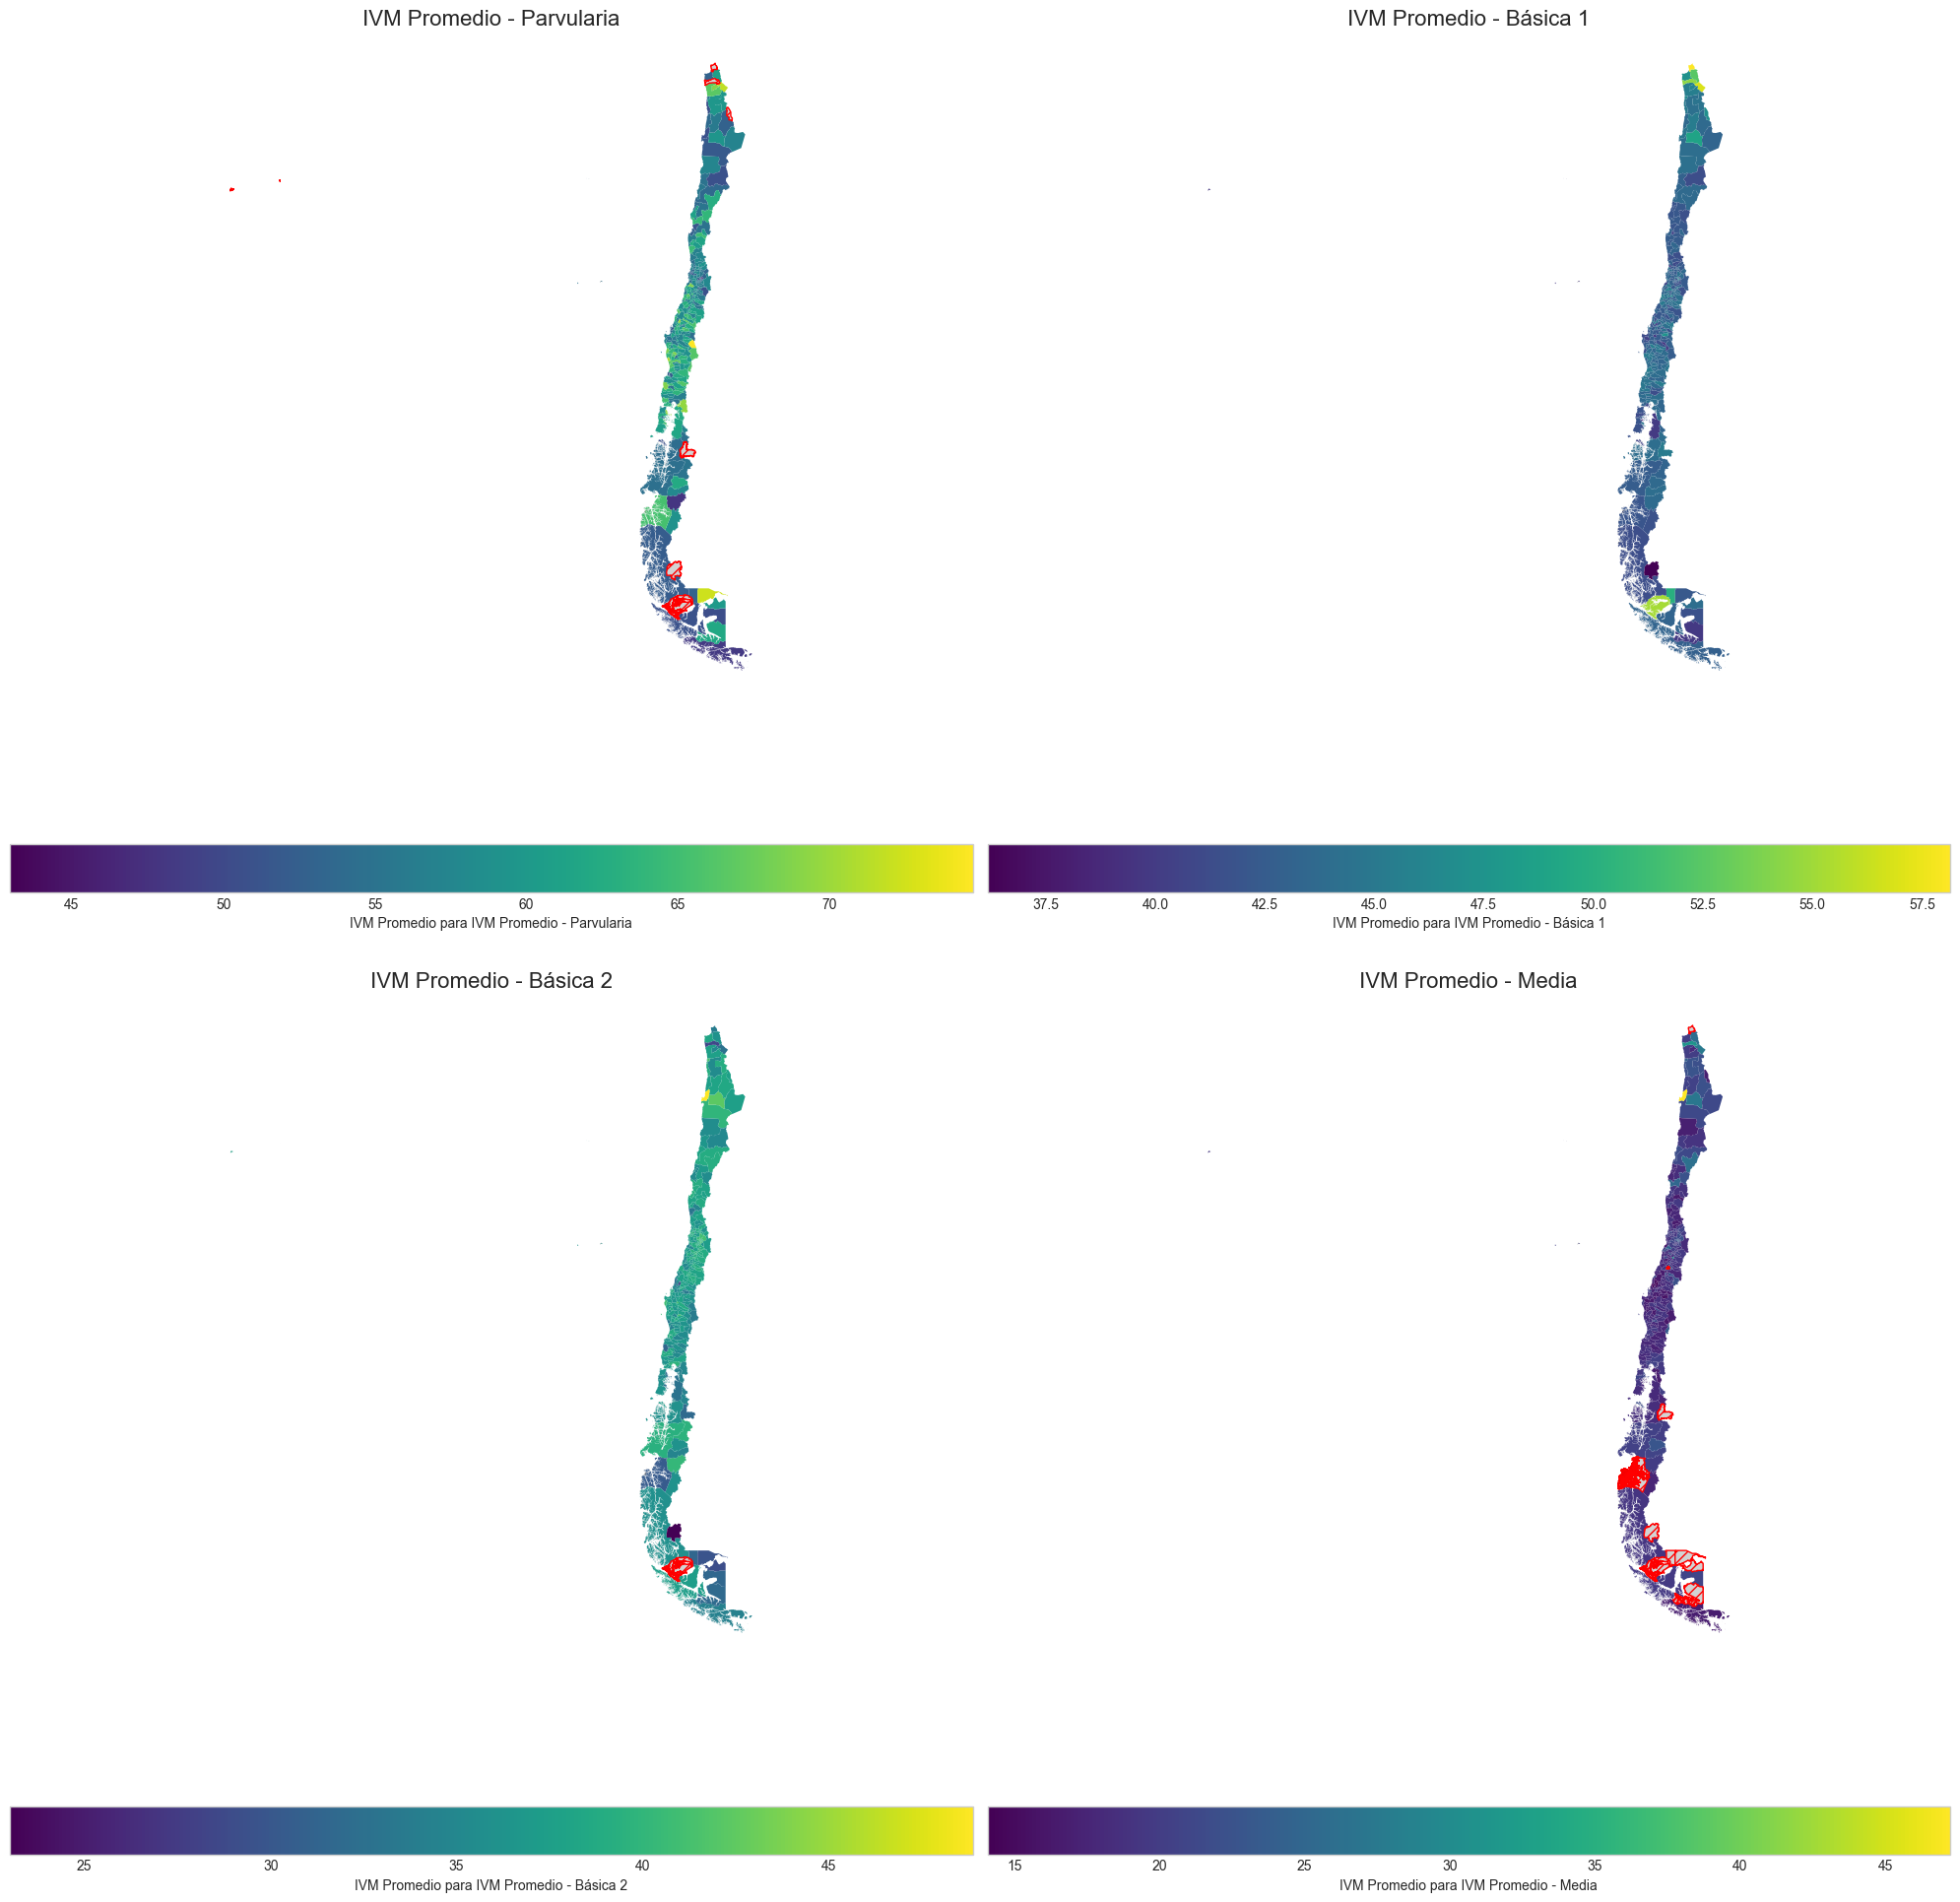

In [ ]:



ivm_cols = {
    'IVM Promedio Parvularia': 'IVM Promedio - Parvularia',
    'IVM Promedio Básica Primer Ciclo': 'IVM Promedio - Básica 1',
    'IVM Promedio Básica Segundo Ciclo': 'IVM Promedio - Básica 2',
    'IVM Promedio Media': 'IVM Promedio - Media'
}


fig, axes = plt.subplots(2, 2, figsize=(20, 20))
axes = axes.flatten() 

for i, (col, title) in enumerate(ivm_cols.items()):
    ax = axes[i]
    agg_comunal.plot(
        column=col,
        ax=ax,
        legend=True,
        cmap='viridis',
        missing_kwds={
            "color": "lightgrey",
            "edgecolor": "red",
            "hatch": "///",
            "label": "Missing values",
        },
        legend_kwds={
            'label': f"IVM Promedio para {title}",
            'orientation': "horizontal"
        }
    )
    ax.set_title(title, fontsize=16)
    ax.set_axis_off() 


plt.tight_layout()
plt.show()

Respuestas o analisis:

A mayor nivel de enseñanza, menor es el índice de vulnerabilidad (IVM) promedio del país. El nivel Parvulario es el que presenta la vulnerabilidad más alta, y el Nivel Medio el más bajo.

Geográficamente, la vulnerabilidad alta se concentra de forma persistente en la zona centro-sur y en puntos de la Región Metropolitana, independientemente del nivel educativo.

Comentarios y análisis:

### 6.2 Relación entre ruralidad comunal y vulnerabilidad (0.7 pts)

En la sección **5.2** definimos el **porcentaje de ruralidad** de cada comuna según la cantidad de establecimientos rurales en cada una. Analice y visualice los datos en `agg_comunal` para responder la siguiente pregunta:

* ¿Hay alguna correlación entre el IVM promedio y el porcentaje de ruralidad en las comunas de Chile?

Matriz de Correlación:
                                        Porcentaje de establecimientos rurales  \
Porcentaje de establecimientos rurales                                1.000000   
IVM Promedio Parvularia                                               0.763507   
IVM Promedio Básica Primer Ciclo                                      0.045639   
IVM Promedio Básica Segundo Ciclo                                    -0.606856   
IVM Promedio Media                                                   -0.265698   

                                        IVM Promedio Parvularia  \
Porcentaje de establecimientos rurales                 0.763507   
IVM Promedio Parvularia                                1.000000   
IVM Promedio Básica Primer Ciclo                       0.066685   
IVM Promedio Básica Segundo Ciclo                     -0.532295   
IVM Promedio Media                                    -0.250368   

                                        IVM Promedio Básica Primer Ciclo  \
Porce

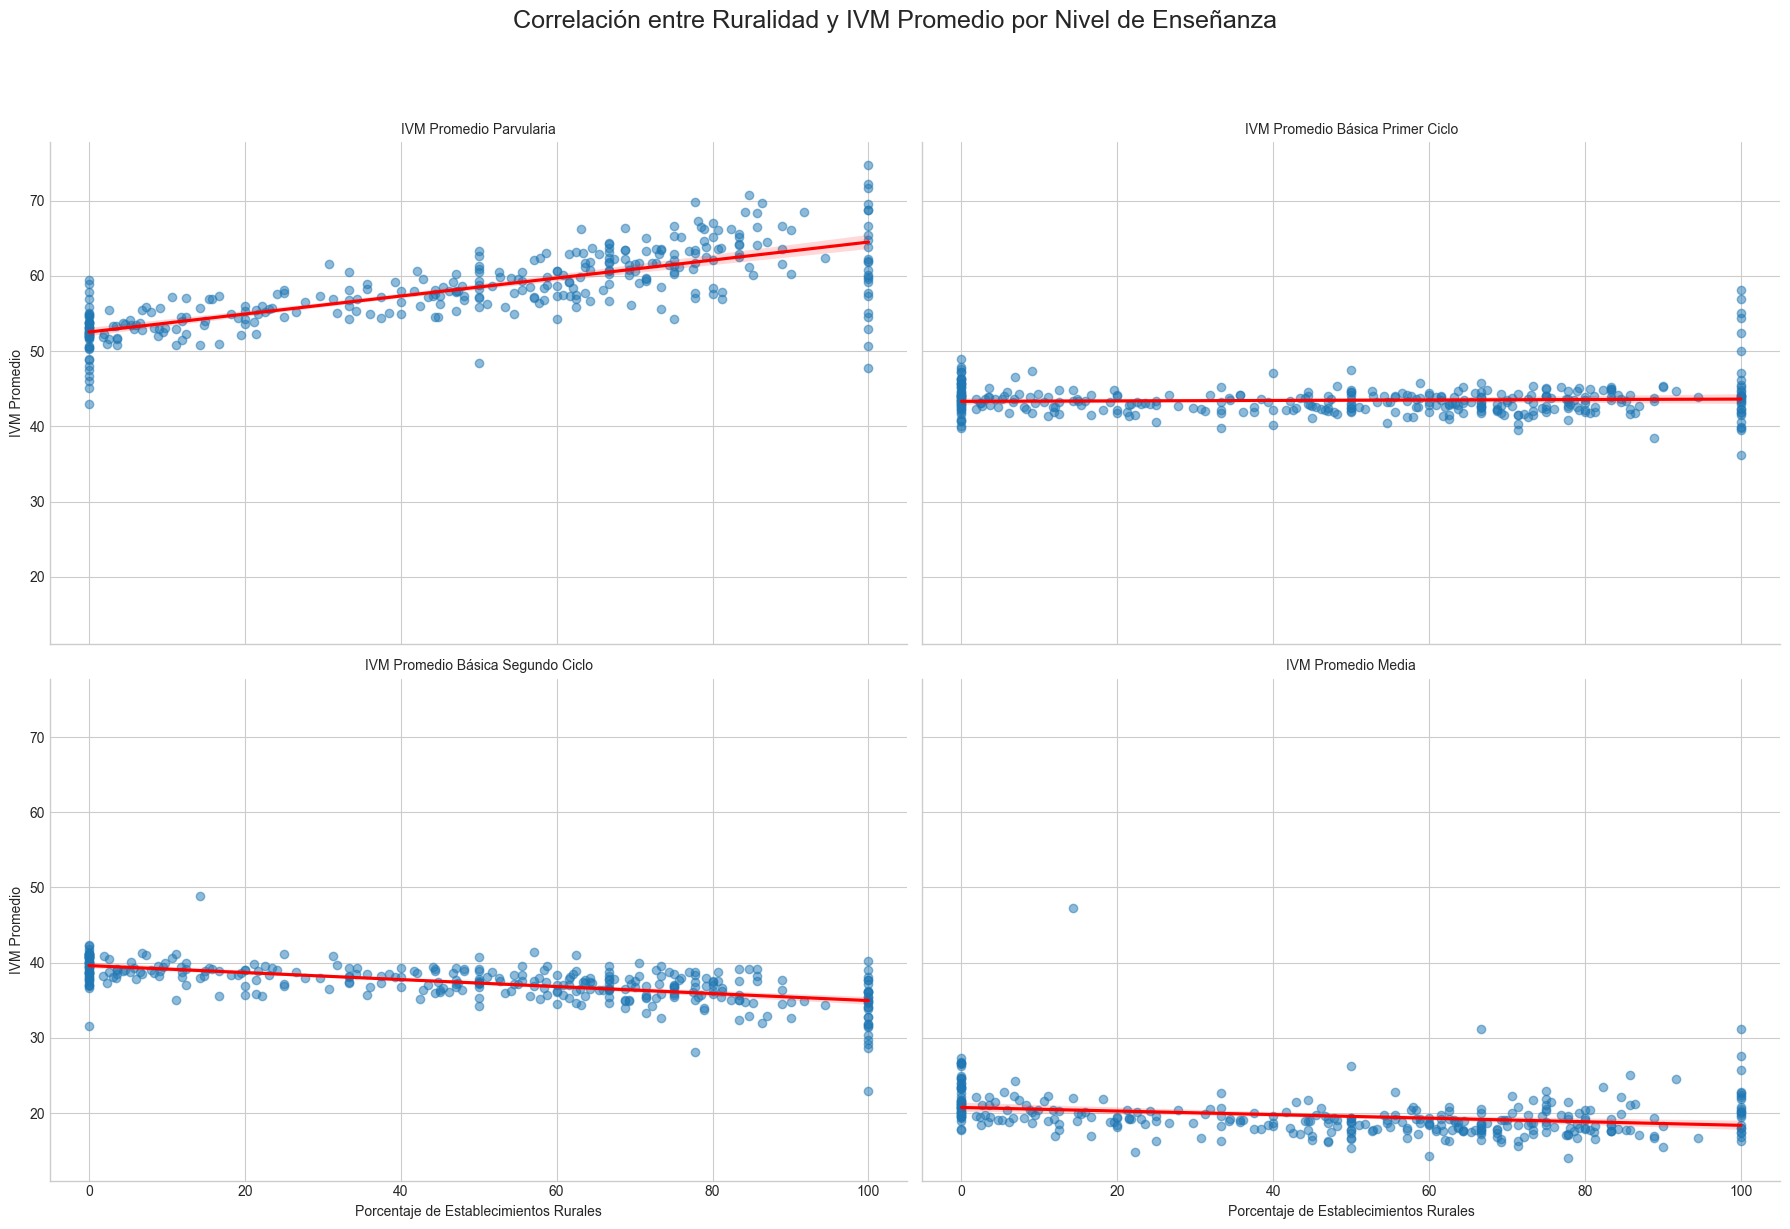

In [ ]:


# 1. Calcular la matriz de correlación
ivm_cols = [
    'IVM Promedio Parvularia',
    'IVM Promedio Básica Primer Ciclo',
    'IVM Promedio Básica Segundo Ciclo',
    'IVM Promedio Media'
]
matriz_de_correlacion = agg_comunal[['Porcentaje de establecimientos rurales'] + ivm_cols].corr()

print("Matriz de Correlación:")
print(matriz_de_correlacion)


melted_df = pd.melt(
    agg_comunal,
    id_vars=['Porcentaje de establecimientos rurales'],
    value_vars=ivm_cols,
    var_name='Nivel de Enseñanza',
    value_name='IVM Promedio'
)


g = sns.FacetGrid(melted_df, col="Nivel de Enseñanza", col_wrap=2, height=6, aspect=1.5)


g.map_dataframe(sns.regplot, x='Porcentaje de establecimientos rurales', y='IVM Promedio',
                scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})


g.set_titles(col_template="{col_name}")
g.set_axis_labels("Porcentaje de Establecimientos Rurales", "IVM Promedio")
plt.suptitle('Correlación entre Ruralidad y IVM Promedio por Nivel de Enseñanza', y=1.02, fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Respuesta y/o analisis:

La relación entre ruralidad y vulnerabilidad no es uniforme y es dependiente del contexto educativo. Asumir que "rural" siempre significa "más vulnerable" sería incorrecto, ya que los datos muestran un panorama mucho más complejo:

En Parvularia, la ruralidad es un factor crítico. Existe una correlación positiva y fuerte ($r = 0.76$), indicando que las comunas más rurales tienden a tener, de forma significativa, los índices de vulnerabilidad más altos en la educación preescolar. La dependencia es clara.

En Básica, esta relación desaparece. La correlación es prácticamente nula (cercana a $r = 0$ para ambos ciclos). El nivel de ruralidad de una comuna no parece ser un factor determinante; no hay una tendencia clara que asocie ruralidad con más o menos vulnerabilidad en esta etapa.

En Media, la tendencia se invierte levemente. Se observa una correlación negativa débil ($r = -0.266$). Esto sugiere una ligera tendencia a que las comunas más rurales presenten índices de vulnerabilidad promedio menores en la educación secundaria.Este hallazgo es clave, ya que demuestra que las políticas públicas no pueden abordar la ruralidad de la misma manera en todos los niveles. Las dinámicas de vulnerabilidad y ruralidad interactúan de maneras muy distintas a lo largo de la trayectoria educativa de los estudiantes en el país.

## 7 Pregunta Bono (2 punto)

* Proponga una pregunta de análisis que le interese responder con los datos de cualquiera de las bases de datos leídas o generadas durante esta Tarea.
Respóndala de la misma forma que las preguntas anteriores, generando una o varias visualizaciones y analizando sus resultados. Justifique 

**Recomendación**: Trate de proponer una pregunta que justifique el uso de agregación de datos y visualización. En otras palabras, que
no pueda ser respondida directamente sin el uso de gráficos (por ejemplo, *"¿cuál es el establecimiento con mayor IVM?"* puede ser respondida con una búsqueda rápida en el DataFrame).

**Pregunta propuesta:**

In [ ]:
# respuesta